In [1]:
import umap
import hdbscan
import numpy as np
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
# Dimension reduction and clustering libraries
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
%matplotlib inline

In [2]:
%cd Z:\PPMI_Data\Excels\NonMotors\Derived250\Male\GeneCpG\UPSIT
df = pd.read_csv ("UPSIT3Categ_Methylome_Male.csv")
print(df.shape)
df.head(2)

Z:\PPMI_Data\Excels\NonMotors\Derived250\Male\GeneCpG\UPSIT
(307, 5679)


,Sentrix,PATNO,HYS,Gender,APPRDX,UPSIT_3,UPSIT_Total,cg06067658,cg15442538,cg25928446,...,cg05766881,cg01708543,cg10933281,cg04735449,cg15856662,cg11864127,cg14420798,cg08859349,cg01481205,cg19228755
0,200991620021_R01C01,3001,2,1,1,1,25,0.088679,0.890148,0.719238,...,0.748763,0.830052,0.861102,0.855659,0.788271,0.805084,0.729165,0.803183,0.925666,0.849608
1,200973410167_R04C01,3007,2,1,1,2,18,0.128668,0.916448,0.726893,...,0.886279,0.898054,0.896800,0.911732,0.863749,0.893595,0.829444,0.866504,0.917233,0.786606


In [4]:
df_data = df.drop(['PATNO', 'Sentrix', 'HYS', 'Gender', 'UPSIT_3','UPSIT_Total','APPRDX'], axis=1)
df_data.head(2)

,cg06067658,cg15442538,cg25928446,cg12415575,cg26358225,cg19058526,cg20195763,cg23725394,cg27107076,cg15657055,...,cg05766881,cg01708543,cg10933281,cg04735449,cg15856662,cg11864127,cg14420798,cg08859349,cg01481205,cg19228755
0,0.088679,0.890148,0.719238,0.066678,0.151532,0.133249,0.479724,0.926745,0.538423,0.697562,...,0.748763,0.830052,0.861102,0.855659,0.788271,0.805084,0.729165,0.803183,0.925666,0.849608
1,0.128668,0.916448,0.726893,0.066768,0.198886,0.141136,0.412058,0.876792,0.665097,0.797354,...,0.886279,0.898054,0.896800,0.911732,0.863749,0.893595,0.829444,0.866504,0.917233,0.786606


In [5]:
# Perform PCA and save first 10 PCs
pca = PCA(n_components=10)
pca.fit(df_data)
pca_components = pca.transform(df_data)
df_pca = pd.DataFrame(data=pca_components, columns=[f"PC{i}" for i in range(1, 11)])

# Add targets to PCA dataframe
df_pca["APPRDX"] = df["APPRDX"]

In [6]:
# Print summary of PCA results
print("PCA explained variance ratio:", pca.explained_variance_ratio_)

PCA explained variance ratio: [0.13633155 0.08441189 0.05603154 0.02744378 0.02238754 0.01861411
 0.0162529  0.01442198 0.01380419 0.01356167]


In [7]:
# Display PCA dataframe
print(df_pca.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.519308  0.338740 -0.398345 -0.462881 -0.455086  0.916995  0.031293   
1  1.431714  0.471253  0.497881  1.209446  0.034958  1.233029 -0.430102   
2  1.577456 -0.388465  0.849215  0.934124 -0.045027  1.251764 -0.444067   
3 -1.868123  0.464867 -0.873980  0.683942  0.228373 -0.218050 -0.094321   
4 -0.270381 -0.458636 -1.011067 -0.642216  0.020485 -0.082805  0.470678   

        PC8       PC9      PC10  APPRDX  
0 -0.205164 -0.474767  0.526767       1  
1  0.090655  0.586319  0.536023       1  
2  0.259798  0.727924  0.538309       1  
3  0.439261 -0.340778  0.327179       1  
4 -0.297846  0.866627 -0.085066       1  


In [8]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], marker='o',label='Scatter',markerfacecolor='#F1746B', markersize=30, color='floralwhite'),
                Line2D([0], [0], marker='o',label='Scatter',markerfacecolor='#36C3D1', markersize=30, color='floralwhite')]

In [9]:
import umap

# Perform UMAP on first 10 PCs
umap_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0, n_components=2, random_state=42).fit_transform(df_pca.iloc[:, :-1])


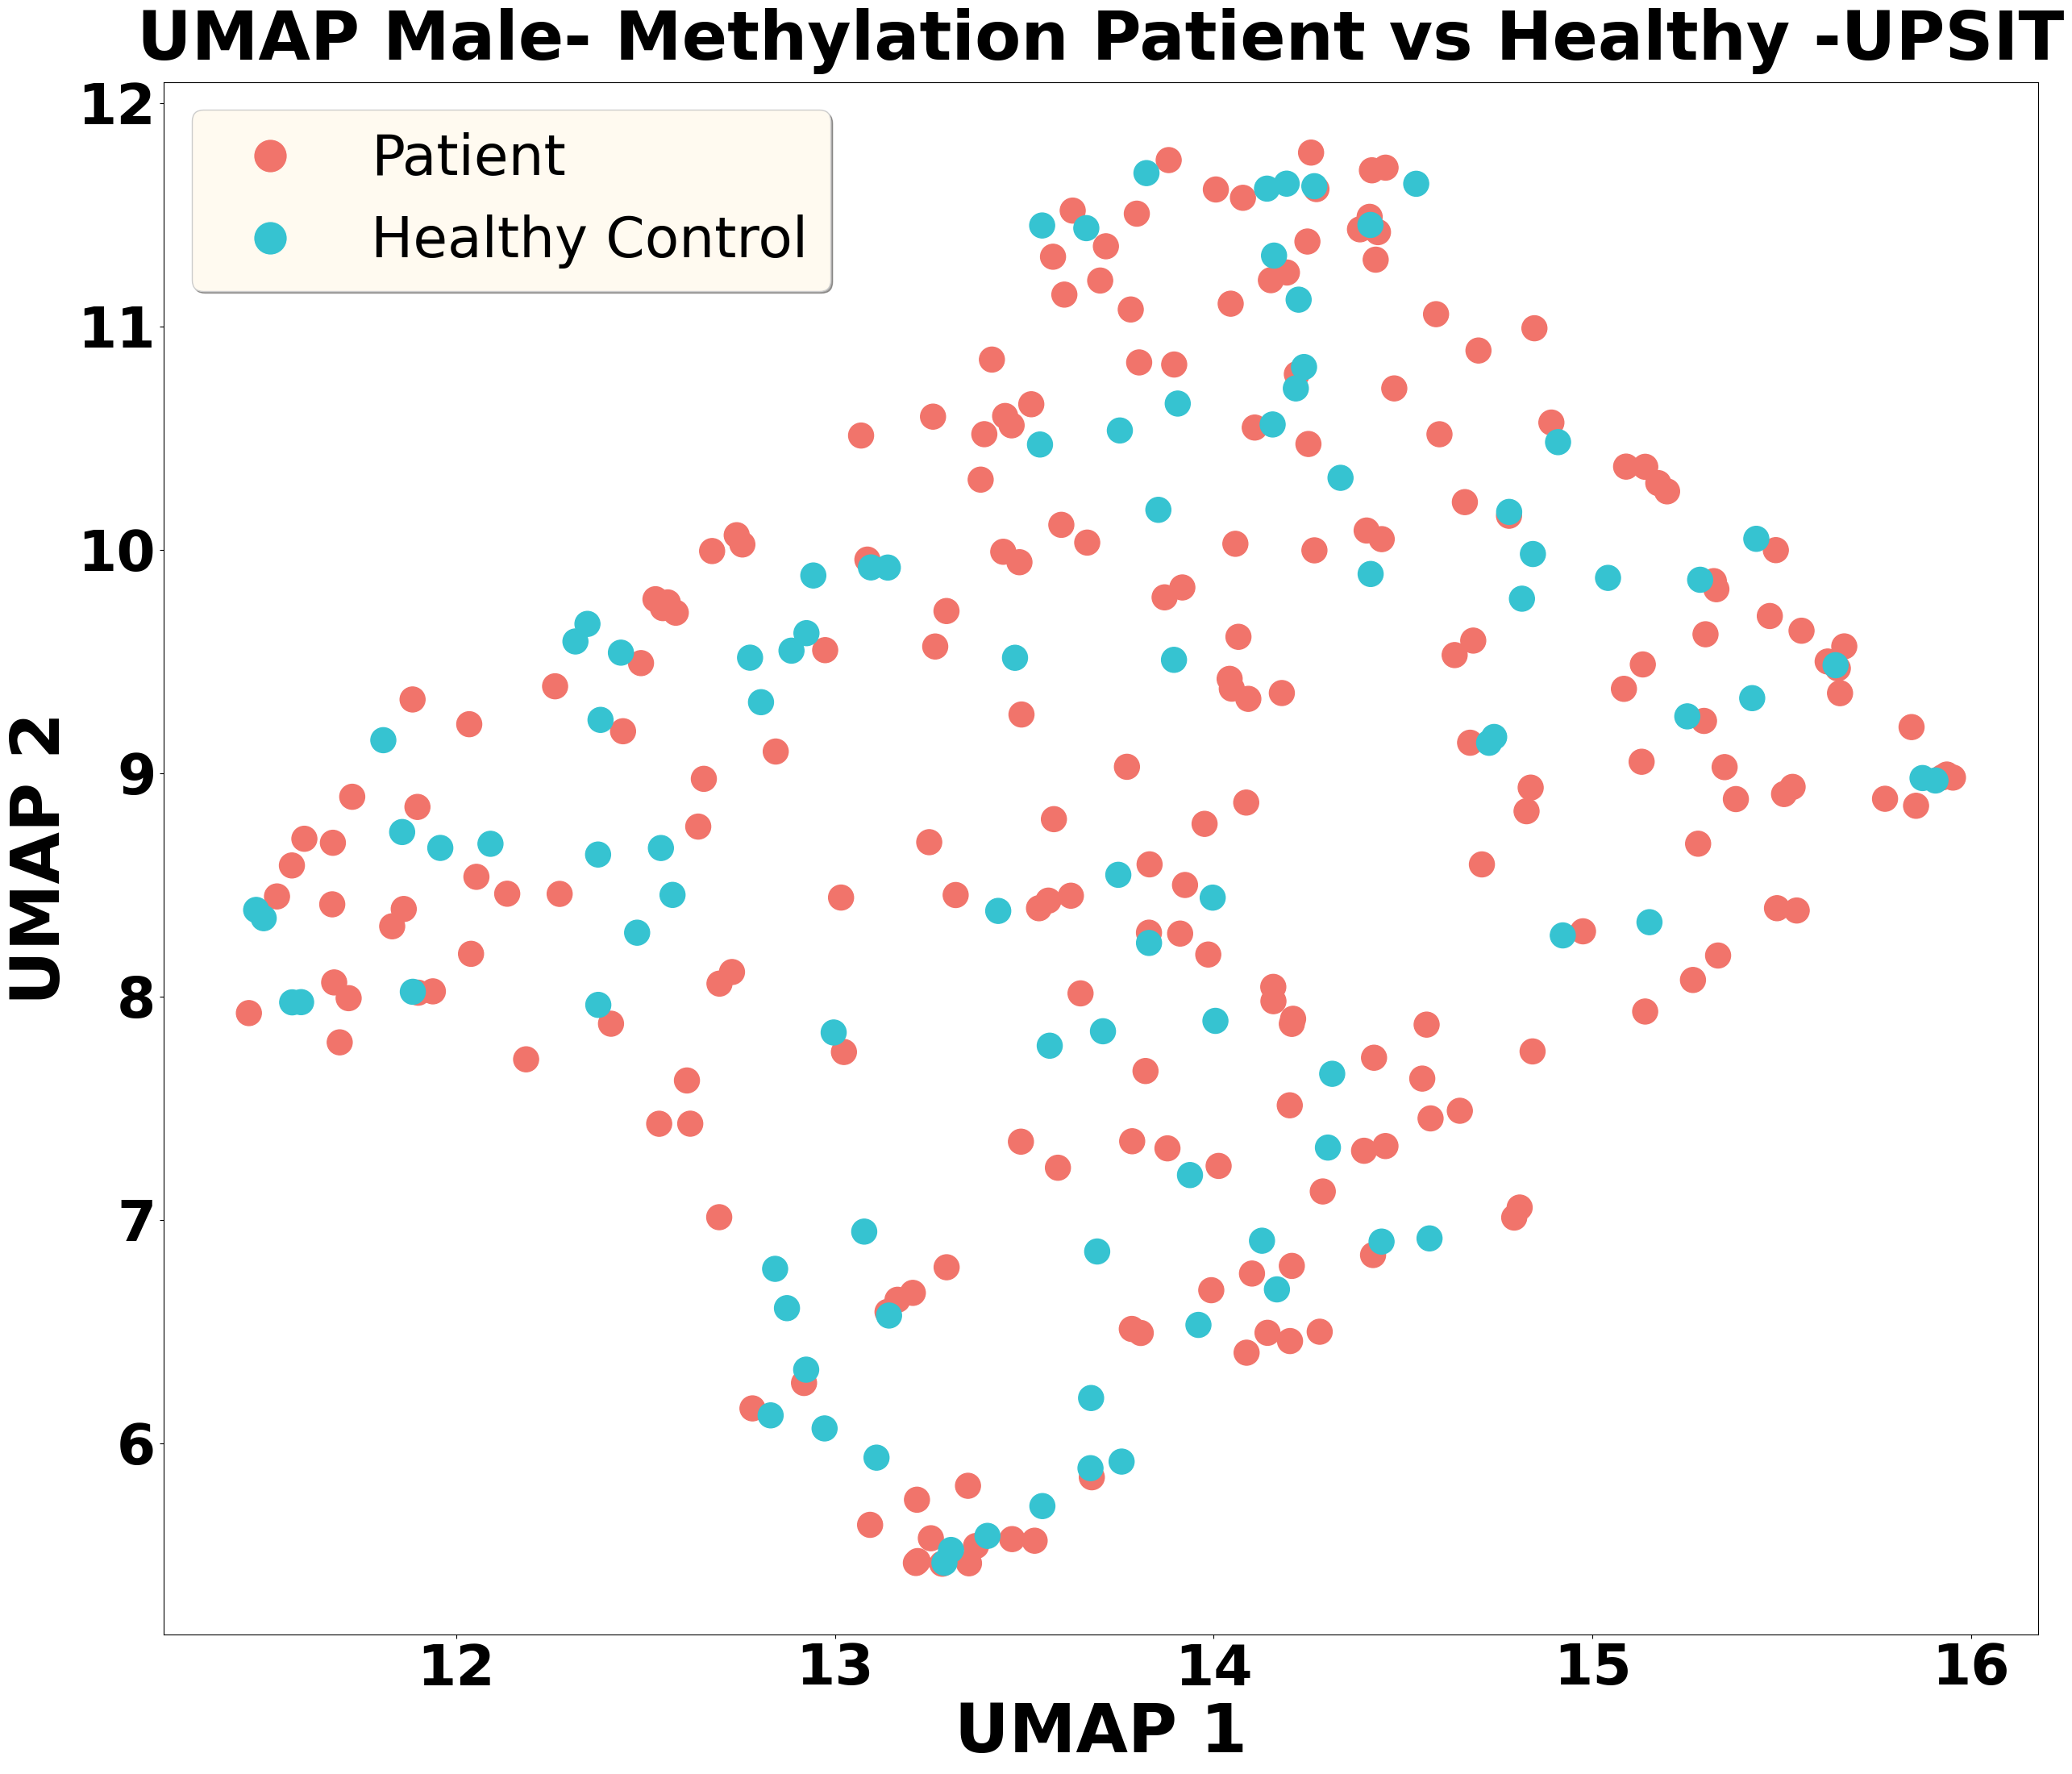

In [10]:

# Plot results
colors = {"1": "#F1746B", "2": "#36C3D1"}
plt.figure(figsize=(30, 25))  # Modify the size of the figure
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=df_pca["APPRDX"].astype(str).map(colors), s=500)
plt.xlabel('UMAP 1', fontsize=60, fontweight='bold', color='black')
plt.ylabel('UMAP 2', fontsize=60, fontweight='bold', color='black')
plt.xticks(fontsize=50, fontweight='bold', color='black')
plt.yticks(fontsize=50, fontweight='bold', color='black')
plt.legend(custom_lines, ['Patient', 'Healthy Control'], loc='upper left',shadow = True,
           facecolor = 'floralwhite',prop = {'size' : 50})
plt.title(label="UMAP Male- Methylation Patient vs Healthy -UPSIT", fontsize=60, fontweight='bold',
          color="black", pad=20)
plt.savefig("UMAP_on10PCA_CpG_PatVsHealthy_UPSIT.pdf", format="pdf")
plt.savefig("UMAP_on10PCA_CpG_PatVsHealthy_UPSIT.svg", format="svg")
plt.show()


In [11]:
# Perform PCA and save first 10 PCs
pca = PCA(n_components=5)
pca.fit(df_data)
pca_components = pca.transform(df_data)
df_pca = pd.DataFrame(data=pca_components, columns=[f"PC{i}" for i in range(1, 6)])

# Add targets to PCA dataframe
df_pca["APPRDX"] = df["APPRDX"]

In [12]:
# Print summary of PCA results
print("PCA explained variance ratio:", pca.explained_variance_ratio_)

# Display PCA dataframe
print(df_pca.head())

PCA explained variance ratio: [0.13633155 0.08441189 0.05603154 0.02744378 0.02238747]
        PC1       PC2       PC3       PC4       PC5  APPRDX
0  0.519308  0.338740 -0.398343 -0.462982 -0.453648       1
1  1.431714  0.471253  0.497881  1.209442  0.034370       1
2  1.577456 -0.388465  0.849214  0.934160 -0.045560       1
3 -1.868123  0.464867 -0.873979  0.683849  0.228473       1
4 -0.270381 -0.458636 -1.011066 -0.642268  0.021726       1


In [13]:

# Perform UMAP on first 10 PCs
umap_embedding = umap.UMAP(n_neighbors=20, min_dist=0.5, n_components=2, random_state=42).fit_transform(df_pca.iloc[:, :-1])


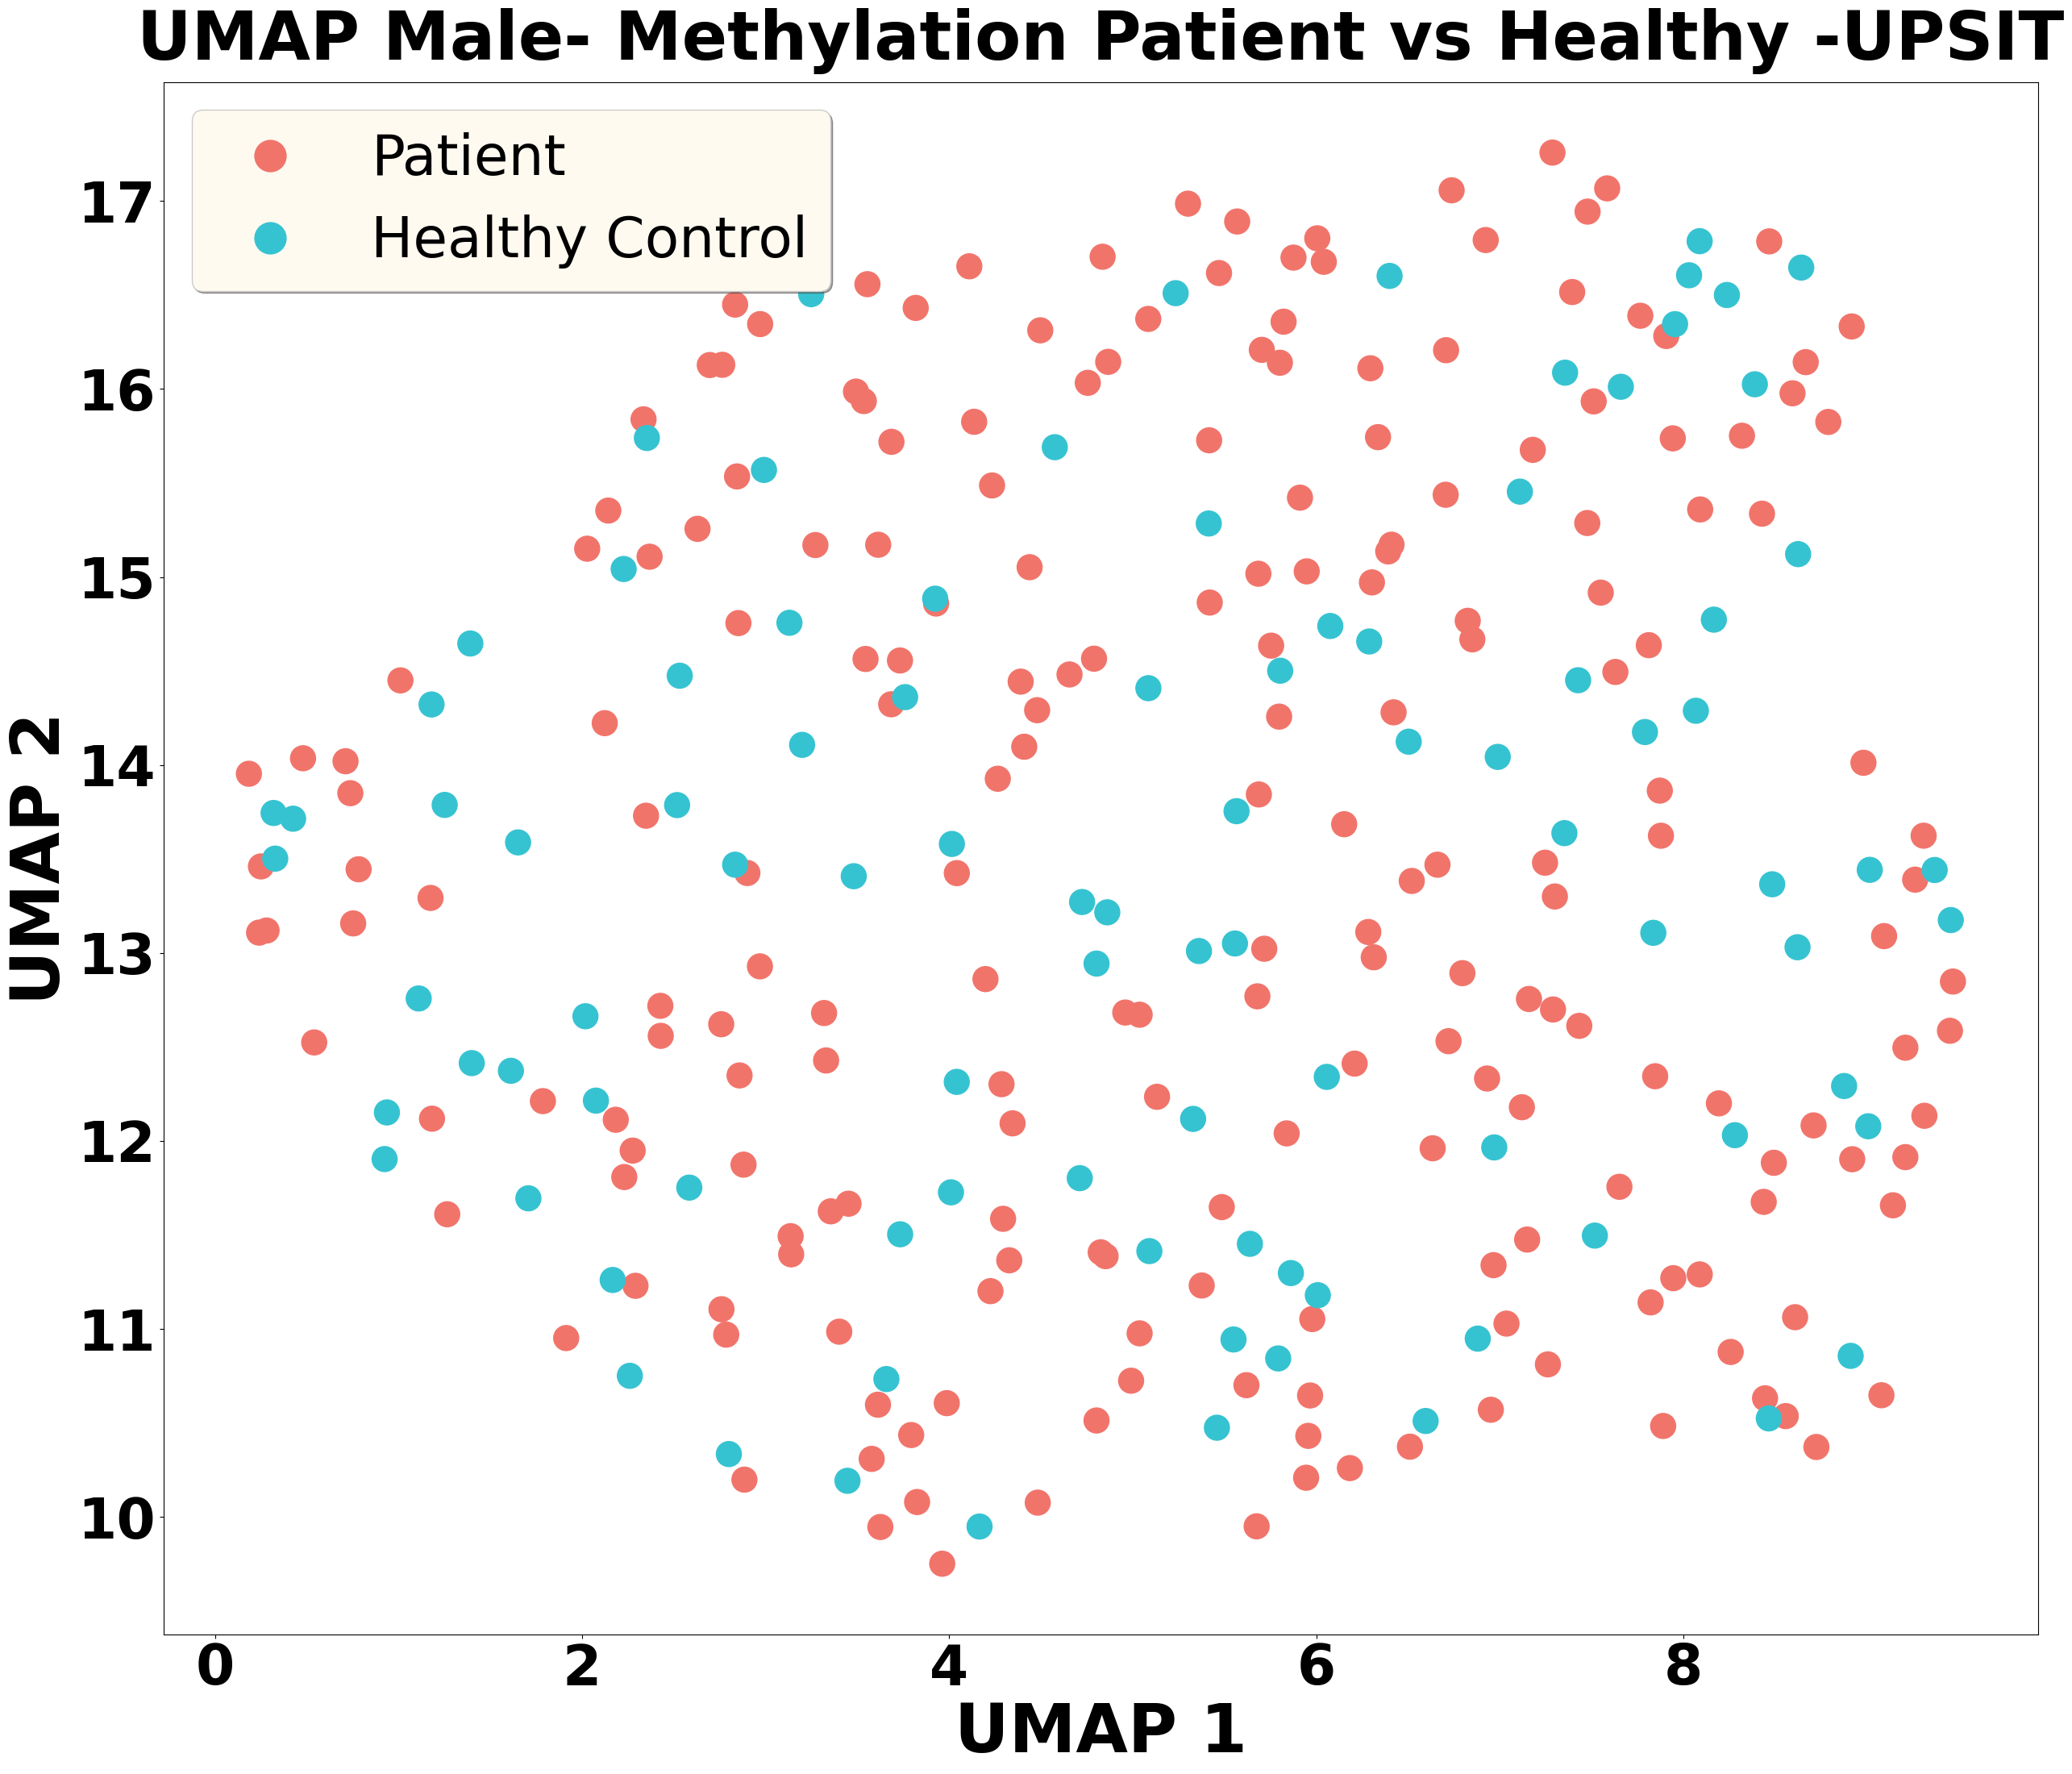

In [15]:

# Plot results
colors = {"1": "#F1746B", "2": "#36C3D1"}
plt.figure(figsize=(30, 25))  # Modify the size of the figure
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=df_pca["APPRDX"].astype(str).map(colors), s=500)
plt.xlabel('UMAP 1', fontsize=60, fontweight='bold', color='black')
plt.ylabel('UMAP 2', fontsize=60, fontweight='bold', color='black')
plt.xticks(fontsize=50, fontweight='bold', color='black')
plt.yticks(fontsize=50, fontweight='bold', color='black')
plt.legend(custom_lines, ['Patient', 'Healthy Control'], loc='upper left',shadow = True,
           facecolor = 'floralwhite',prop = {'size' : 50})
plt.title(label="UMAP Male- Methylation Patient vs Healthy -UPSIT", fontsize=60, fontweight='bold',
          color="black", pad=20)
plt.savefig("UMAP_on5PCA_CpG_PatVsHealthy_UPSIT.pdf", format="pdf")
plt.savefig("UMAP_on5PCA_CpG_PatVsHealthy_UPSIT.svg", format="svg")
plt.show()
